Установка библиотеки Ultralytics

In [2]:
!pip install ultralytics==8.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 55.7 MB/s eta 0:00:00


Импорт библиотек

In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from PIL import Image
import matplotlib.pyplot as plt

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


## Подбор гиперпараметров с помощью `tune` (генетического алгоритма)

Датасет взят с сайта Roboflow https://universe.roboflow.com/realmetalru/gb-bktjr/dataset/2

Необходимая структура датасета

    datasets
      ├── train
      |   ├── images
      |   └── labels
      ├── val
      |   ├── images
      |   └── labels
      └── test
          ├── images
          └── labels


Содержание файла data.yaml

```
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['g']
```



Подключение к диску для сохрания результатов подбора параметров

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Определение модели

In [5]:
model_tune = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


Подбор параметров

In [6]:
model_tune.tune(data="/content/datasets/data.yaml",
                epochs=30, # эпохи
                iterations=20, # количество моделей со своим набором гиперпараметров
                optimizer='AdamW',
                project="/content/drive/MyDrive/sinavki", # место, куда сохраняем результаты подбора параметров
                plots=False, save=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=/content/drive/MyDrive/sinavki/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/20 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved /content/drive/MyDrive/sinavki/tune/tune_scatter_plots.png
Saved /content/drive/MyDrive/sinavki/tune/tune_fitness.png

Tuner: 1/20 iterations complete ✅ (414.03s)
Tuner: Results saved to /content/drive/MyDrive/sinavki/tune
Tuner: Best fitness=0.5771 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.73829, 'metrics/recall(B)': 0.90275, 'metrics/mAP50(B)': 0.89534,



> Для подбора оптимальных параметров на практике нужно задавать гораздо больше итераций для генетического алгоритма




Это график, отображающий зависимость фитнеса (обычно это метрика производительности) от количества итераций. Он помогает визуализировать, насколько хорошо генетический алгоритм справлялся со своей задачей с течением времени.

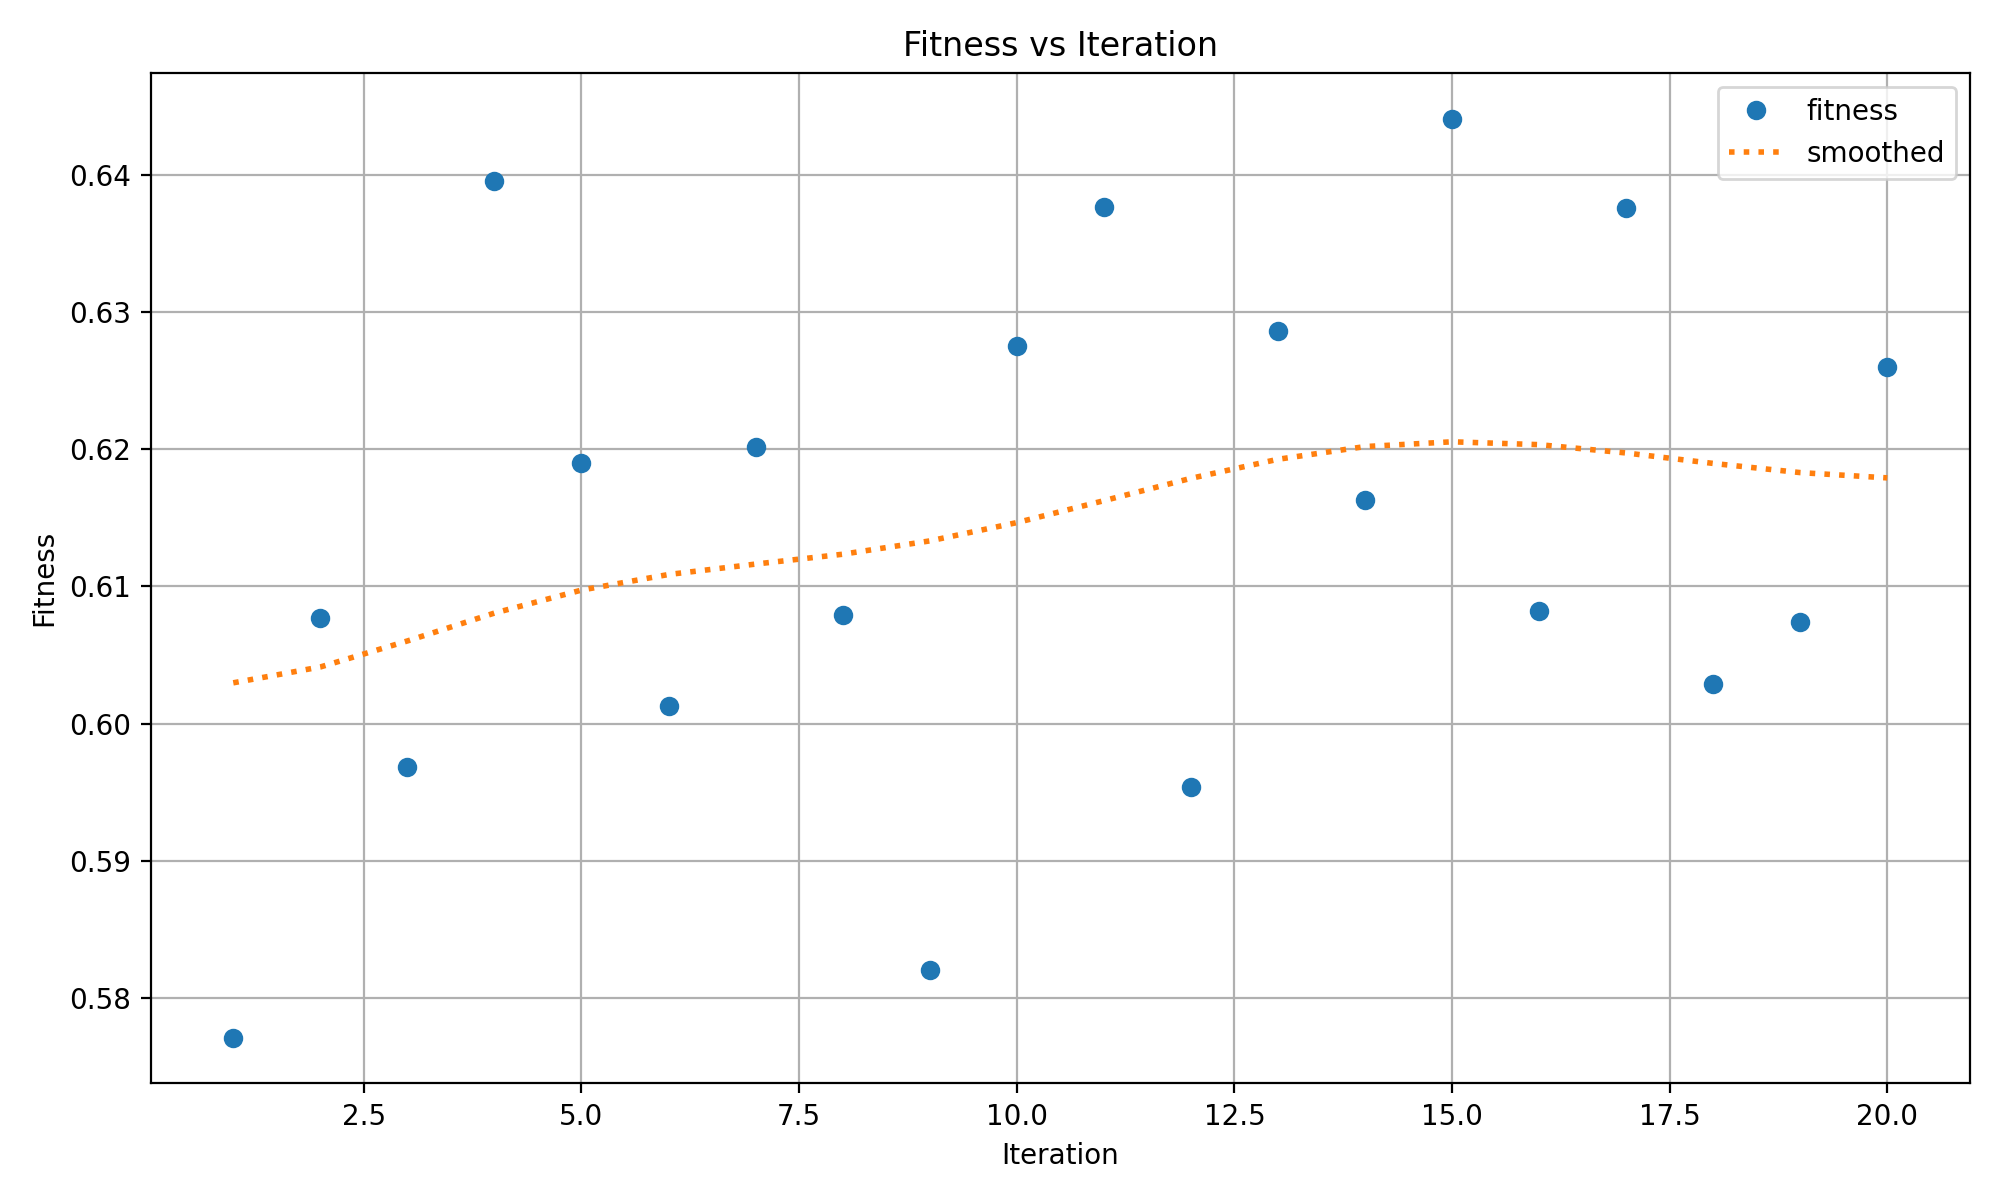

In [8]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/sinavki/tune/tune_fitness.png', width=750)

Документация Ultralytics https://docs.ultralytics.com/guides/hyperparameter-tuning/

`best_hyperparameters.yaml` - этот YAML-файл содержит гиперпараметры с наилучшими показателями, найденные в процессе настройки. Используем этот файл для инициализации будущих тренировок с этими оптимизированными настройками.

## Обучение модели на подобранных параметрах

In [5]:
model = YOLO('yolov8n.pt')
results = model.train(data="/content/datasets/data.yaml",
                      epochs=350,
                      cfg='/content/drive/MyDrive/sinavki/tune/best_hyperparameters.yaml' # гиперпараметры, подобрные с помощью генетического алгоритма
                     )

100%|██████████| 6.25M/6.25M [00:00<00:00, 265MB/s]


Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/data.yaml, epochs=350, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 86.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 325MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 630 images, 3 backgrounds, 0 corrupt: 100%|██████████| 630/630 [00:00<00:00, 1543.10it/s]


train: New cache created: /content/datasets/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 852. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<00:00, 498.25it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00876' and 'momentum=0.92087' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.00047), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 350 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/350      2.32G      1.989      4.868      1.143         11        640: 100%|██████████| 40/40 [00:17<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         61         75    0.00262       0.64     0.0134    0.00464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/350      2.28G      1.982      3.351      1.182          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         61         75    0.00197       0.48     0.0273    0.00979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/350      2.37G      2.016      2.705      1.187          8        640: 100%|██████████| 40/40 [00:13<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         61         75      0.293     0.0933       0.24      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/350      2.36G      1.985      2.373      1.203         11        640: 100%|██████████| 40/40 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         61         75      0.788      0.547      0.661        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/350      2.39G      1.959      2.028      1.156         17        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         61         75      0.779       0.76      0.732      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/350      2.35G      1.965      1.902      1.197         31        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         61         75      0.724      0.667      0.698      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/350      2.35G      1.926       1.74      1.197          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         61         75      0.574      0.628      0.549      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/350      2.35G      1.921      1.728      1.215          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         61         75      0.802      0.787      0.837      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/350      2.37G      1.889      1.591      1.201         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         61         75       0.85      0.613      0.726       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/350      2.36G      1.842      1.511      1.136         20        640: 100%|██████████| 40/40 [00:11<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         61         75       0.62      0.773      0.746      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/350      2.35G       1.84      1.468      1.169          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         61         75      0.762       0.68      0.781      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/350      2.37G      1.819      1.407      1.161         13        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         61         75      0.783      0.866      0.847      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/350      2.36G      1.757      1.304      1.138         13        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         61         75      0.763      0.816      0.843        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/350      2.35G      1.786      1.372      1.131         13        640: 100%|██████████| 40/40 [00:10<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         61         75      0.693      0.787      0.751      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/350      2.37G      1.834      1.389      1.152          6        640: 100%|██████████| 40/40 [00:13<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61         75      0.913      0.702      0.852       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/350      2.39G      1.827      1.331      1.135         13        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         61         75      0.767        0.8      0.834      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/350      2.35G      1.751      1.265      1.135         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         61         75       0.83        0.8      0.843      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/350      2.35G      1.731      1.218      1.119          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         61         75      0.704      0.856      0.823      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/350      2.37G      1.707      1.164      1.106          9        640: 100%|██████████| 40/40 [00:11<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         61         75      0.792        0.8      0.874      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/350      2.37G      1.754      1.248      1.146          8        640: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         61         75      0.794      0.824      0.856      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/350      2.37G      1.685      1.162      1.105          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         61         75      0.876       0.72      0.813      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/350      2.36G       1.71      1.182      1.097          6        640: 100%|██████████| 40/40 [00:15<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         61         75      0.811      0.733      0.837      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/350      2.35G      1.769      1.256      1.117          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         61         75       0.74       0.72      0.807      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/350      2.39G       1.68      1.159      1.088         14        640: 100%|██████████| 40/40 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         61         75      0.761        0.8      0.837      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/350      2.35G       1.72       1.22      1.097         13        640: 100%|██████████| 40/40 [00:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         61         75      0.754        0.8      0.811      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/350      2.37G      1.726      1.185      1.107          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         61         75      0.762       0.77      0.838      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/350      2.35G        1.7      1.224      1.117          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         61         75      0.703       0.82      0.804        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/350      2.35G      1.682       1.13      1.083         12        640: 100%|██████████| 40/40 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         61         75      0.754      0.815      0.869      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/350      2.35G      1.657       1.15      1.113          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         61         75      0.708      0.679      0.748      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/350      2.35G      1.673      1.125      1.091         13        640: 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         61         75      0.863      0.787      0.878      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/350      2.35G      1.664      1.112      1.085          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         61         75      0.746       0.76      0.815        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/350      2.36G      1.668       1.12      1.086          9        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         61         75      0.838      0.853      0.891      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/350      2.35G      1.639      1.112      1.083         15        640: 100%|██████████| 40/40 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         61         75      0.865      0.747       0.87      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/350      2.35G      1.662       1.07      1.089          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         61         75      0.776      0.787      0.833      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/350      2.35G      1.615      1.077      1.068          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         61         75      0.892      0.747      0.865      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/350      2.35G       1.59      1.076      1.069         14        640: 100%|██████████| 40/40 [00:13<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         61         75      0.866       0.72      0.832      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/350      2.35G      1.628       1.11      1.064         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         61         75      0.861      0.742      0.851      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/350      2.35G      1.603      1.085      1.063          9        640: 100%|██████████| 40/40 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.801      0.751      0.828      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/350      2.35G      1.654      1.086      1.087         19        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         61         75      0.858      0.827       0.91      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/350      2.35G      1.592      1.065      1.085          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         61         75      0.837       0.84      0.866       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/350      2.35G      1.613      1.076      1.073          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         61         75      0.792      0.747      0.853      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/350      2.37G      1.624      1.075      1.063          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         61         75      0.867      0.733       0.82      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/350      2.37G      1.579      1.064      1.071         11        640: 100%|██████████| 40/40 [00:11<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         61         75       0.73      0.827      0.875      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/350      2.35G       1.61      1.077      1.076         15        640: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         61         75      0.828       0.84      0.898      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/350      2.35G      1.605      1.018      1.064          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         61         75       0.85      0.867      0.876       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/350      2.35G      1.567     0.9964      1.036         12        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         61         75      0.889      0.827      0.912      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/350      2.34G      1.596      1.012       1.07         16        640: 100%|██████████| 40/40 [00:11<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         61         75      0.845       0.88      0.887      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/350      2.36G      1.537      1.008      1.048         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         61         75       0.86      0.853      0.875      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/350      2.35G      1.518     0.9917      1.047         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         61         75      0.814       0.88      0.903      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/350      2.35G      1.513      1.022      1.028         15        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         61         75      0.903      0.749      0.822      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/350      2.35G      1.586      1.012      1.073          4        640: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         61         75      0.878      0.765       0.84      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/350      2.36G      1.579      0.979      1.047         18        640: 100%|██████████| 40/40 [00:11<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         61         75      0.869      0.813      0.852      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/350      2.35G       1.54     0.9848      1.058          7        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         61         75      0.854      0.856      0.878      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/350      2.35G       1.47     0.9669      1.025         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         61         75      0.811       0.92      0.891      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/350      2.35G      1.488     0.9974      1.051          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         61         75      0.936      0.783      0.875      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/350      2.35G      1.466     0.9388      1.018          5        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         61         75      0.738      0.867      0.839      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/350      2.37G      1.602      1.025      1.044         11        640: 100%|██████████| 40/40 [00:11<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         61         75      0.825      0.853      0.857      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/350      2.36G      1.583      1.036      1.057          6        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         61         75       0.78      0.804      0.835      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/350      2.35G      1.527      1.037      1.034          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         61         75      0.796      0.827      0.863      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/350      2.36G      1.508     0.9524      1.055         12        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         61         75      0.831       0.84      0.866      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/350      2.35G      1.575      1.045      1.054         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         61         75      0.877      0.813      0.841      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/350      2.35G      1.498     0.9686      1.039         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         61         75      0.934      0.749      0.862      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/350      2.35G      1.473     0.9628      1.027          6        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         61         75      0.869      0.827      0.873      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/350      2.35G      1.468     0.9861      1.026         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         61         75      0.814      0.867      0.862      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/350      2.35G       1.51      0.945      1.027          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         61         75      0.766      0.873      0.812      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/350      2.36G      1.477     0.9341      1.009         16        640: 100%|██████████| 40/40 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         61         75      0.845       0.84      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/350      2.35G      1.477     0.9347      1.017         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         61         75      0.911       0.72      0.864      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/350      2.35G      1.435     0.9073       1.01         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         61         75      0.875        0.8      0.887       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/350      2.35G      1.519     0.9285      1.024          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         61         75        0.9      0.747      0.821      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/350      2.35G      1.461     0.9377      1.033         10        640: 100%|██████████| 40/40 [00:13<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         61         75      0.848      0.827      0.863       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/350      2.37G      1.512     0.9691      1.048         14        640: 100%|██████████| 40/40 [00:11<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         61         75      0.858       0.76      0.881      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/350      2.34G       1.44     0.9167      1.013         17        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         61         75      0.839       0.84      0.862      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/350      2.36G      1.464      0.896      1.037         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         61         75      0.861      0.773      0.853      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/350      2.35G      1.458     0.9376      1.014         13        640: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         61         75      0.859       0.76      0.818      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/350      2.35G      1.465     0.8953      1.013          8        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         61         75      0.901      0.728      0.848      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/350      2.34G       1.45     0.9196          1         12        640: 100%|██████████| 40/40 [00:11<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         61         75      0.877      0.854      0.897      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/350      2.35G      1.455     0.8841     0.9977          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         61         75      0.883       0.88      0.913       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/350      2.37G      1.481     0.9046      1.015          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.877      0.763      0.853      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/350      2.36G      1.466     0.9304       1.01          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         61         75      0.833      0.853      0.874      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/350      2.35G      1.407     0.8664      1.007          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         61         75      0.888      0.787      0.881      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/350      2.36G      1.447     0.9122      1.032         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         61         75      0.821      0.792      0.859      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/350      2.37G      1.415      0.884     0.9908         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         61         75      0.836        0.8      0.859      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/350      2.35G      1.444      0.886      1.016         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         61         75      0.897       0.84      0.917      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/350      2.35G      1.427     0.8587      1.027         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         61         75      0.897      0.893      0.917      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/350      2.35G      1.468     0.9018      1.025         11        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75        0.9      0.813      0.889      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/350      2.35G      1.421     0.8766      1.002         19        640: 100%|██████████| 40/40 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         61         75      0.926       0.84      0.908      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/350      2.35G      1.403     0.8482      1.022          6        640: 100%|██████████| 40/40 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         61         75      0.912       0.84      0.897      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/350      2.36G      1.416     0.8702     0.9983          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.803      0.927      0.903      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/350      2.35G      1.397     0.8698     0.9883          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         61         75      0.835       0.88      0.873      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/350      2.38G      1.396     0.8407     0.9782          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         61         75      0.843        0.8      0.875      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/350      2.39G      1.328     0.8065      0.984         12        640: 100%|██████████| 40/40 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         61         75      0.834       0.72        0.8      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/350      2.37G      1.434     0.8873     0.9931         23        640: 100%|██████████| 40/40 [00:13<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         61         75       0.93      0.747      0.863      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/350      2.37G       1.35     0.8317     0.9719         13        640: 100%|██████████| 40/40 [00:15<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         61         75      0.846      0.907       0.87      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/350      2.35G      1.349     0.8357     0.9788         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         61         75       0.85       0.88      0.907      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/350      2.35G      1.412     0.8444     0.9838         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75       0.77      0.846      0.849      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/350      2.36G      1.384     0.8738      1.001          5        640: 100%|██████████| 40/40 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         61         75      0.829      0.839       0.85       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/350      2.35G      1.396     0.8338     0.9869          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         61         75      0.858       0.84      0.868       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/350      2.35G      1.378     0.8457     0.9712          6        640: 100%|██████████| 40/40 [00:15<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         61         75      0.898       0.76      0.864      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/350      2.37G      1.381     0.8445     0.9821         16        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         61         75      0.926        0.8       0.88      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/350      2.37G      1.339     0.8482     0.9749         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         61         75      0.943      0.787      0.868       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/350      2.37G      1.356     0.7939     0.9867         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         61         75       0.92      0.772      0.877      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/350      2.35G      1.347      0.811      0.988         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         61         75      0.803      0.893      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/350      2.35G      1.372      0.841     0.9922          7        640: 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         61         75       0.82      0.893        0.9       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/350      2.35G      1.367      0.814     0.9708         12        640: 100%|██████████| 40/40 [00:13<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         61         75      0.888      0.848      0.893      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/350      2.35G      1.407      0.868      1.001          8        640: 100%|██████████| 40/40 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.898      0.827       0.86      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/350      2.36G       1.44     0.8537      1.008          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         61         75      0.848       0.82      0.875      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/350      2.36G      1.304     0.7967     0.9584         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         61         75      0.861      0.893      0.904      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/350      2.39G      1.321      0.777     0.9628          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         61         75      0.927      0.851      0.932      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/350      2.35G      1.349     0.8237     0.9853          6        640: 100%|██████████| 40/40 [00:13<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         61         75      0.842      0.867      0.911      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/350      2.35G      1.331     0.8367     0.9698          8        640: 100%|██████████| 40/40 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.886      0.827      0.882      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/350      2.35G      1.341     0.8039     0.9623          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.916      0.813      0.902       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/350      2.34G      1.298     0.7806     0.9566         13        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         61         75      0.863      0.838      0.879      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/350      2.35G      1.306     0.7923     0.9682         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         61         75      0.864      0.853      0.842      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/350      2.35G      1.306       0.79     0.9503          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         61         75      0.919      0.853      0.898      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/350      2.36G      1.343     0.8086     0.9804         13        640: 100%|██████████| 40/40 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         61         75      0.862      0.853      0.907      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/350      2.35G      1.278     0.7606     0.9481         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         61         75      0.864       0.84      0.884      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/350      2.35G      1.303      0.751     0.9638         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         61         75      0.838      0.853      0.874      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/350      2.36G        1.3     0.7806     0.9701          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         61         75      0.838      0.893      0.905      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/350      2.37G      1.289      0.774     0.9491          8        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         61         75       0.92      0.766      0.875      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/350      2.35G      1.269     0.7725      0.952         12        640: 100%|██████████| 40/40 [00:11<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         61         75      0.837       0.88      0.909      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/350      2.36G      1.303     0.7748     0.9719          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         61         75      0.797      0.853       0.86      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/350      2.37G      1.325      0.808     0.9642         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         61         75      0.916      0.876      0.914      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/350      2.36G      1.263     0.7491     0.9566          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         61         75      0.936      0.853      0.919      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/350      2.35G      1.321     0.7988      0.969         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         61         75      0.852       0.92      0.894      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/350      2.35G      1.299     0.7745     0.9657         12        640: 100%|██████████| 40/40 [00:11<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         61         75      0.921       0.78      0.892      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/350      2.35G      1.299     0.7694     0.9512          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         61         75      0.904      0.813      0.889      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/350      2.36G      1.321     0.7641     0.9724          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         61         75      0.854      0.853      0.868      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/350      2.37G      1.274     0.7594     0.9413          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.936      0.783      0.896      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/350      2.35G      1.295     0.7526     0.9651         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         61         75      0.891       0.88      0.886      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/350      2.37G      1.269     0.7373      0.936         13        640: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         61         75      0.888       0.88      0.913      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/350      2.36G        1.3     0.7779     0.9483         12        640: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         61         75      0.922      0.791      0.906      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/350      2.36G      1.286     0.7686     0.9616          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         61         75      0.849      0.907      0.936      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/350      2.36G      1.264     0.7493     0.9242          5        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         61         75      0.841      0.933      0.928      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/350      2.35G      1.232     0.7309     0.9469         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.874      0.832      0.902      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/350      2.34G      1.211     0.7483     0.9326         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         61         75      0.894      0.867      0.923      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/350      2.35G      1.274     0.7513     0.9463          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         61         75      0.877      0.856      0.898      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/350      2.35G      1.304     0.7852     0.9581         15        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61         75      0.843       0.84      0.869      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/350      2.35G      1.259     0.7487     0.9465          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         61         75      0.831      0.854      0.904      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/350      2.36G      1.234     0.7472     0.9346          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         61         75      0.902      0.827      0.904      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/350      2.35G      1.241     0.7737      0.946         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         61         75      0.938      0.813      0.902      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/350      2.35G      1.229     0.7162     0.9398          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         61         75      0.875       0.84       0.89      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/350      2.35G      1.244     0.7512     0.9415          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         61         75      0.935      0.853      0.891      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/350      2.35G      1.269     0.7382     0.9371         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.914      0.813      0.904       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/350      2.36G      1.207     0.7158     0.9116         16        640: 100%|██████████| 40/40 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         61         75      0.863      0.827       0.89        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/350      2.35G      1.231     0.7484     0.9488         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         61         75      0.945      0.813      0.916      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/350      2.35G      1.215     0.7708     0.9387         19        640: 100%|██████████| 40/40 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         61         75       0.93       0.84      0.893       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/350      2.35G      1.248     0.7204     0.9449         14        640: 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         61         75      0.816       0.89      0.899      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/350      2.34G      1.225      0.734     0.9253         20        640: 100%|██████████| 40/40 [00:13<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         61         75       0.83       0.88      0.905      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/350      2.35G      1.246     0.7491     0.9363         13        640: 100%|██████████| 40/40 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         61         75      0.899      0.834      0.887      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/350      2.35G      1.227     0.7243      0.936         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         61         75       0.88      0.878      0.904      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/350      2.37G      1.186      0.713     0.9092         15        640: 100%|██████████| 40/40 [00:13<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         61         75      0.807      0.891      0.884      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/350      2.35G      1.215     0.7147     0.9352         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         61         75      0.943      0.813       0.91      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/350      2.35G        1.2     0.7179     0.9442          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         61         75      0.916      0.877      0.916      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/350      2.36G      1.212     0.7414     0.9392         13        640: 100%|██████████| 40/40 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         61         75      0.924      0.827      0.909      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/350      2.35G      1.212     0.7196     0.9199          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         61         75      0.937      0.853      0.923      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/350      2.35G      1.205      0.722     0.9346         19        640: 100%|██████████| 40/40 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         61         75      0.904       0.92      0.936      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/350      2.35G       1.19     0.6962     0.9238          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         61         75      0.915      0.813      0.905      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/350      2.36G      1.178     0.7043     0.9139         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         61         75      0.932       0.84      0.932      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/350      2.35G      1.159     0.7029     0.9208         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         61         75      0.941      0.852      0.917       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/350      2.35G      1.198     0.7436     0.9334         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         61         75      0.854      0.858      0.886      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/350      2.39G      1.191     0.7062     0.9194         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         61         75      0.914      0.852      0.917      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/350      2.35G       1.15      0.674     0.9141          8        640: 100%|██████████| 40/40 [00:15<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         61         75      0.839      0.893       0.91      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/350      2.35G      1.187     0.7203     0.9263         15        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         61         75       0.86      0.819      0.876      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/350      2.35G      1.189     0.6834     0.9146         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         61         75      0.875        0.8      0.907      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/350      2.35G      1.198     0.7045      0.926         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         61         75      0.876      0.813      0.881      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/350      2.37G      1.154     0.6883     0.9031         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         61         75      0.847      0.853      0.904      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/350      2.35G       1.18     0.6978     0.8978         24        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         61         75      0.803      0.869      0.876      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/350      2.37G      1.169     0.7069      0.917          8        640: 100%|██████████| 40/40 [00:13<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         61         75      0.848      0.827      0.911      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/350      2.35G      1.195     0.6981      0.926         13        640: 100%|██████████| 40/40 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         61         75      0.889      0.867      0.905      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/350      2.35G      1.184     0.6968     0.9256          6        640: 100%|██████████| 40/40 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.879      0.813      0.886      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/350      2.35G      1.132     0.6841     0.9058          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         61         75      0.888      0.813      0.896      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/350      2.35G      1.126     0.6544     0.9136          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         61         75      0.899      0.835      0.897      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/350      2.35G      1.133      0.696     0.9034         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         61         75      0.846       0.84      0.889      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/350      2.36G      1.143     0.6811     0.9099          8        640: 100%|██████████| 40/40 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         61         75      0.875       0.84      0.904      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/350      2.37G      1.145     0.6871     0.9107         13        640: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         61         75      0.883      0.867      0.923      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/350      2.36G      1.132     0.6635     0.9166         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         61         75      0.852      0.827      0.883      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/350      2.35G      1.118     0.6527     0.8922         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         61         75      0.909        0.8      0.904      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/350      2.35G      1.179     0.6786     0.9316         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         61         75      0.858      0.853      0.909       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/350      2.37G      1.155     0.6887     0.9211         11        640: 100%|██████████| 40/40 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         61         75      0.915      0.853      0.921      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/350      2.36G      1.185     0.6997     0.9201          4        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61         75       0.89      0.853      0.896      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/350      2.37G      1.146     0.6835     0.9148          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         61         75      0.872      0.827      0.884      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/350      2.36G      1.166     0.6954     0.9163          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         61         75      0.925       0.84      0.927       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/350      2.37G      1.104     0.6614     0.9007         16        640: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         61         75      0.904       0.84      0.902      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/350      2.36G      1.124     0.6689     0.9103         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         61         75       0.87      0.801      0.853      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/350      2.35G      1.128     0.6795      0.899         10        640: 100%|██████████| 40/40 [00:13<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         61         75      0.933      0.827      0.901      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/350      2.36G      1.113      0.653     0.8993         15        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         61         75      0.907      0.853      0.896       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/350      2.35G      1.114     0.6695     0.8896          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         61         75      0.925      0.823      0.932       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/350      2.36G      1.136      0.654     0.8952         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         61         75      0.855       0.88      0.923      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/350      2.35G      1.107     0.6663     0.9058          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         61         75      0.854      0.893      0.902      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/350      2.35G      1.115     0.6504     0.8905         14        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         61         75      0.894      0.902      0.901       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/350      2.36G      1.098     0.6567     0.8921          5        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         61         75      0.897      0.853      0.895      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/350      2.36G      1.126     0.6827     0.8995          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         61         75      0.868      0.878      0.882      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/350      2.35G      1.172     0.6772     0.9135         14        640: 100%|██████████| 40/40 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         61         75      0.861      0.907      0.911      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/350      2.35G      1.112      0.654     0.9001         13        640: 100%|██████████| 40/40 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         61         75      0.856      0.893       0.89      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/350      2.35G      1.096     0.6615      0.877          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         61         75      0.859       0.88      0.889      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/350      2.37G      1.092     0.6504     0.8899         13        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         61         75      0.888      0.842      0.898      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/350      2.37G      1.096     0.6578     0.8832          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         61         75       0.87      0.892      0.903      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/350      2.37G       1.08     0.6417     0.8888         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         61         75      0.899      0.893      0.896      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/350      2.35G        1.1     0.6788     0.8975          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         61         75      0.878      0.862      0.897      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/350      2.37G      1.087     0.6559     0.8911         11        640: 100%|██████████| 40/40 [00:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         61         75       0.82      0.933      0.919      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/350      2.34G       1.08     0.6507      0.881         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         61         75      0.862      0.867      0.911      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/350      2.37G      1.089     0.6528     0.8916         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61         75      0.899      0.907      0.924      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/350      2.36G      1.099     0.6382     0.8793         18        640: 100%|██████████| 40/40 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         61         75      0.896      0.918      0.928      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/350      2.34G      1.069     0.6195      0.893         12        640: 100%|██████████| 40/40 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         61         75      0.884       0.84      0.891      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/350      2.35G      1.042     0.6148     0.8796         11        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         61         75      0.901      0.851      0.904      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/350      2.35G      1.045     0.6302     0.8795         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         61         75      0.927      0.851      0.889      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/350      2.35G      1.063     0.6077     0.8765         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         61         75      0.902      0.854      0.912      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/350      2.35G      1.124     0.6583     0.8993         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         61         75      0.943      0.827      0.923      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/350      2.39G      1.057     0.6088     0.8804         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         61         75      0.943      0.876      0.927      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/350      2.35G       1.08     0.6432     0.8881         10        640: 100%|██████████| 40/40 [00:13<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         61         75      0.889      0.858      0.907      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/350      2.36G      1.036     0.6142     0.8834          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         61         75       0.91      0.808      0.897      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/350      2.35G      1.062      0.615     0.8812         19        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         61         75       0.89      0.863      0.923      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/350      2.37G      1.041     0.6146     0.8834         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         61         75      0.887      0.837      0.909      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/350      2.35G      1.054     0.6284     0.8783         19        640: 100%|██████████| 40/40 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         61         75      0.837      0.933      0.924      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/350      2.35G      1.065      0.634      0.873         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.888       0.88      0.911      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/350      2.35G       1.11     0.6413     0.8889          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61         75      0.879       0.88        0.9      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/350      2.35G      1.062     0.6323     0.8769         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         61         75      0.866      0.813      0.879      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/350      2.35G      1.048     0.6137     0.8751          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         61         75      0.927        0.8      0.896      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/350      2.35G       1.04     0.6178     0.8576          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         61         75      0.941      0.857      0.929      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/350      2.35G      1.027     0.5996     0.8726         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         61         75      0.929       0.88      0.923      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/350      2.34G      1.066     0.6139     0.8762         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         61         75      0.943      0.877      0.913      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/350      2.35G      1.052     0.6251     0.8667         14        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         61         75      0.919      0.867      0.922      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/350      2.35G      1.062     0.6032     0.8907          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         61         75      0.879      0.869      0.921      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/350      2.36G      1.058      0.636      0.886          6        640: 100%|██████████| 40/40 [00:13<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         61         75      0.927      0.848      0.895      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/350      2.36G       1.03     0.6064     0.8698         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61         75      0.938      0.812      0.898      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/350      2.35G      1.019     0.6041     0.8787         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         61         75      0.902       0.88      0.914      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/350      2.37G      1.038     0.6051      0.881          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         61         75      0.923      0.805      0.895      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/350      2.35G      1.032     0.5931     0.8687         15        640: 100%|██████████| 40/40 [00:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         61         75      0.915       0.84      0.913      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/350      2.37G      1.053     0.6053     0.8798         13        640: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         61         75      0.934      0.813        0.9      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/350      2.35G     0.9843     0.5733     0.8596         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         61         75      0.917      0.813      0.893      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/350      2.35G       1.01      0.581     0.8707         11        640: 100%|██████████| 40/40 [00:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         61         75      0.862       0.92       0.93      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/350      2.35G     0.9889      0.585     0.8481         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         61         75      0.925      0.853      0.921       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/350      2.35G      1.028     0.5929     0.8601          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         61         75      0.934      0.827      0.895      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/350      2.35G     0.9924     0.5746     0.8477          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         61         75      0.906      0.853      0.928      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/350      2.35G      1.014     0.5907     0.8633         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         61         75      0.911      0.853      0.916      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/350      2.37G     0.9932     0.5863     0.8557         11        640: 100%|██████████| 40/40 [00:13<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.937      0.853      0.911      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/350      2.37G      0.993     0.5719     0.8603         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         61         75      0.919      0.827      0.913      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/350      2.38G     0.9831     0.5886     0.8657          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         61         75      0.926      0.838      0.908      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/350      2.36G      1.008     0.5975     0.8584         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         61         75      0.912      0.867      0.913      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/350      2.35G      1.001     0.5805     0.8552         13        640: 100%|██████████| 40/40 [00:14<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         61         75      0.949       0.84      0.904      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/350      2.34G      1.022     0.6105     0.8784         18        640: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         61         75      0.952      0.796      0.883      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/350      2.35G     0.9828     0.5824      0.847          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         61         75      0.941      0.787      0.897      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/350      2.35G     0.9894     0.5792     0.8647         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         61         75      0.881      0.892      0.919      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/350      2.38G      1.002      0.585     0.8574         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         61         75      0.916       0.87       0.92      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/350      2.35G      1.018     0.5935       0.87         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         61         75      0.903      0.866      0.904      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/350      2.34G     0.9785     0.5724     0.8566         25        640: 100%|██████████| 40/40 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         61         75      0.901      0.848      0.894       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/350      2.39G     0.9662     0.5643     0.8588         11        640: 100%|██████████| 40/40 [00:11<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         61         75      0.936       0.84      0.929      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/350      2.35G     0.9769     0.5774     0.8703          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         61         75       0.93      0.827      0.901      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/350      2.35G      1.004     0.5875     0.8645         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         61         75      0.903       0.87      0.911      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/350      2.35G      1.004     0.5875     0.8766         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         61         75      0.883      0.907      0.927      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/350      2.34G     0.9716       0.59     0.8611         17        640: 100%|██████████| 40/40 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         61         75      0.917       0.84      0.924      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/350      2.35G     0.9931     0.5682     0.8593         15        640: 100%|██████████| 40/40 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         61         75       0.89      0.863      0.922      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/350      2.35G     0.9887      0.574     0.8585         11        640: 100%|██████████| 40/40 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         61         75      0.924      0.853      0.929      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/350      2.36G     0.9385     0.5528     0.8545          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         61         75      0.928      0.863      0.936      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/350      2.36G     0.9724     0.5754     0.8489         17        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         61         75      0.949       0.84      0.938      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/350      2.37G     0.9495     0.5496     0.8617         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         61         75      0.936      0.813      0.913      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/350      2.35G     0.9782     0.5647     0.8531          5        640: 100%|██████████| 40/40 [00:11<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         61         75      0.925      0.822      0.906      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/350      2.37G      0.955     0.5746     0.8525          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         61         75      0.882        0.9      0.923      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/350      2.35G     0.9904     0.5571     0.8644         15        640: 100%|██████████| 40/40 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         61         75      0.893      0.893      0.925      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/350      2.35G     0.9902     0.5784     0.8556         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         61         75      0.929      0.873      0.922      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/350      2.35G     0.9787     0.5763     0.8594          6        640: 100%|██████████| 40/40 [00:12<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         61         75      0.944       0.84      0.916      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/350      2.35G     0.9568     0.5701     0.8517          7        640: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         61         75      0.915      0.867      0.917      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/350      2.36G     0.9616     0.5718     0.8665          9        640: 100%|██████████| 40/40 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         61         75      0.885      0.867      0.905      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/350      2.35G      0.942     0.5581     0.8438          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         61         75      0.892      0.881      0.911      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/350      2.35G     0.9565      0.555     0.8513          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         61         75      0.909      0.907       0.93      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/350      2.35G     0.9334     0.5443     0.8468         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         61         75      0.878      0.861      0.923      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/350      2.35G      0.924       0.54     0.8426         15        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         61         75      0.927      0.827      0.912      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/350      2.35G     0.9543     0.5629     0.8592         15        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         61         75       0.93      0.813      0.916      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/350      2.36G     0.9474     0.5717     0.8603          6        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         61         75      0.898       0.84      0.904      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/350      2.35G     0.9209     0.5388     0.8514         13        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         61         75      0.914      0.854      0.915      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/350      2.36G     0.9654     0.5603      0.867          8        640: 100%|██████████| 40/40 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         61         75      0.919      0.827      0.921      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/350      2.35G     0.9482     0.5784     0.8537         12        640: 100%|██████████| 40/40 [00:12<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         61         75      0.954        0.8      0.913      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/350      2.36G     0.9454     0.5444     0.8414         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         61         75      0.888      0.867      0.921      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/350      2.35G     0.9398     0.5468     0.8409          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         61         75      0.891       0.87      0.924      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/350      2.35G     0.9499     0.5544     0.8502          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.916      0.867      0.927      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/350      2.35G     0.9558     0.5737     0.8428         15        640: 100%|██████████| 40/40 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         61         75      0.902       0.86      0.922       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/350      2.36G     0.9275     0.5432     0.8543          6        640: 100%|██████████| 40/40 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         61         75      0.925      0.817      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/350      2.35G     0.9049     0.5427     0.8355         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         61         75      0.923      0.827      0.906      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/350      2.35G     0.9468     0.5584     0.8502          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         61         75      0.924      0.827      0.908      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/350      2.35G     0.9554      0.565     0.8498          8        640: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75       0.94      0.813      0.922      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/350      2.35G     0.9091     0.5175     0.8394         11        640: 100%|██████████| 40/40 [00:11<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         61         75      0.914      0.852      0.925      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/350      2.35G     0.9182     0.5514     0.8382         10        640: 100%|██████████| 40/40 [00:13<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         61         75      0.863      0.843      0.925      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/350      2.35G     0.9413      0.551     0.8527         12        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         61         75      0.916      0.853      0.926      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/350      2.37G     0.9238     0.5467     0.8394         23        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         61         75      0.889      0.867      0.921      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/350      2.35G     0.9085     0.5329      0.839          7        640: 100%|██████████| 40/40 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         61         75      0.909       0.84      0.904      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/350      2.36G     0.9143     0.5385     0.8328         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         61         75      0.912       0.84      0.902      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/350      2.37G     0.8939      0.531      0.834          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         61         75      0.882      0.867      0.914      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/350      2.36G     0.9168     0.5542     0.8514          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         61         75      0.893      0.893      0.918      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/350      2.35G     0.9039     0.5393     0.8385         13        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.945      0.853      0.922       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/350      2.35G     0.9209     0.5443     0.8412          8        640: 100%|██████████| 40/40 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         61         75       0.89       0.88      0.922      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/350      2.36G     0.9028     0.5402      0.834         16        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         61         75      0.945      0.827      0.923      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/350      2.37G     0.8746     0.5163     0.8272          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         61         75      0.893      0.853      0.909      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/350      2.35G     0.8849     0.5339     0.8375         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         61         75      0.884      0.867      0.901      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/350      2.35G     0.9052     0.5402     0.8333         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         61         75      0.905      0.893      0.914      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/350      2.35G     0.8762     0.5207     0.8325          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         61         75      0.892       0.88      0.918      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/350      2.37G     0.8892     0.5284     0.8367          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         61         75      0.892      0.893       0.91      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/350      2.34G     0.8891     0.5336     0.8236         16        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         61         75      0.889       0.88      0.913      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/350      2.35G     0.8837     0.5388     0.8355         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         61         75      0.915       0.88       0.92      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/350      2.35G        0.9     0.5385     0.8456          6        640: 100%|██████████| 40/40 [00:12<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         61         75      0.939      0.853      0.921      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/350      2.36G     0.8713     0.5418     0.8237         10        640: 100%|██████████| 40/40 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         61         75      0.901      0.867      0.919      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/350      2.36G     0.8842     0.5174     0.8384          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         61         75      0.888      0.867      0.917      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/350      2.37G     0.8731     0.5088     0.8344         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         61         75      0.919       0.84      0.926      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/350      2.37G     0.8769     0.5285     0.8365         13        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         61         75      0.915      0.858      0.931      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/350      2.36G     0.8823     0.5342      0.838          9        640: 100%|██████████| 40/40 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         61         75      0.905      0.853      0.923      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/350      2.35G     0.8655     0.5133     0.8272         11        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         61         75       0.94      0.836      0.918      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/350      2.36G     0.8978     0.5302     0.8511          8        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         61         75      0.941      0.827      0.916      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/350      2.35G     0.8705     0.5296     0.8275         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         61         75      0.926      0.839      0.915      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/350      2.35G     0.8643      0.505     0.8268          4        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         61         75      0.954      0.826      0.916      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/350      2.35G     0.8974     0.5363     0.8377         13        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         61         75      0.926      0.837      0.917      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/350      2.35G      0.844     0.5121     0.8236          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         61         75      0.921       0.84      0.924      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/350      2.36G     0.8632     0.5123     0.8274         14        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         61         75      0.924      0.853       0.92      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/350      2.34G     0.8917     0.5145     0.8459         19        640: 100%|██████████| 40/40 [00:15<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         61         75      0.924      0.853      0.917      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/350      2.35G     0.8683     0.5133     0.8304         17        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         61         75      0.908      0.867      0.927      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/350      2.35G      0.838     0.4973     0.8123          6        640: 100%|██████████| 40/40 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.922      0.853      0.927      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/350      2.36G     0.8492     0.5059     0.8238          5        640: 100%|██████████| 40/40 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         61         75      0.927      0.847      0.928      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/350      2.35G     0.8583       0.51     0.8216         16        640: 100%|██████████| 40/40 [00:14<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         61         75      0.878       0.88      0.919      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/350      2.35G     0.8461     0.4861     0.8305          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         61         75      0.912      0.853      0.919      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/350      2.35G     0.8816     0.5134     0.8253         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         61         75      0.887       0.88      0.914      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/350      2.37G     0.8348     0.4962     0.8256         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         61         75      0.927      0.849      0.918      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/350      2.36G     0.8212      0.494     0.8193          6        640: 100%|██████████| 40/40 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         61         75      0.923      0.853      0.918       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/350      2.35G     0.8495     0.5101     0.8255          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         61         75       0.94      0.839       0.92      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/350      2.35G     0.8798     0.5257     0.8352         11        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         61         75      0.925       0.84       0.92      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/350      2.37G     0.8485      0.505     0.8283         11        640: 100%|██████████| 40/40 [00:13<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         61         75      0.914      0.849      0.921      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/350      2.35G     0.8488     0.5072     0.8187         17        640: 100%|██████████| 40/40 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         61         75      0.901      0.867       0.92      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/350      2.34G      0.819     0.4797     0.8096         18        640: 100%|██████████| 40/40 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         61         75      0.915       0.84      0.921      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/350      2.37G       0.84      0.488     0.8185         15        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         61         75      0.918       0.84      0.921      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/350      2.35G     0.8137     0.4912     0.8169          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         61         75      0.892      0.878      0.913      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/350      2.35G     0.8567     0.5217     0.8252          8        640: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         61         75      0.896      0.867      0.909      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/350      2.35G     0.8627     0.5112     0.8189         19        640: 100%|██████████| 40/40 [00:11<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         61         75      0.873       0.88      0.908      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/350      2.35G     0.8367     0.4971     0.8239         16        640: 100%|██████████| 40/40 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         61         75      0.879      0.875       0.91      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/350      2.37G     0.8347     0.4973     0.8271         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         61         75      0.902       0.88      0.912      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/350      2.37G     0.8359     0.4984     0.8228          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         61         75      0.887       0.88      0.914      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/350      2.35G     0.8257     0.4926     0.8277         22        640: 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         61         75      0.877       0.88      0.914      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/350      2.37G     0.8308     0.4923     0.8169         15        640: 100%|██████████| 40/40 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         61         75      0.922       0.84      0.914      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/350      2.35G     0.8141      0.483     0.8164         16        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         61         75      0.893      0.888      0.917      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/350      2.37G     0.8477     0.5081     0.8179         10        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         61         75      0.905       0.88      0.921      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/350      2.35G     0.8226      0.508     0.8288          9        640: 100%|██████████| 40/40 [00:14<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         61         75      0.929      0.866      0.923      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/350      2.35G     0.8399     0.5023     0.8146         12        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         61         75      0.897      0.893      0.923      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/350      2.34G     0.8279     0.4827     0.8326         19        640: 100%|██████████| 40/40 [00:11<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         61         75        0.9      0.893      0.926      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/350      2.36G     0.8061     0.4706     0.8149          9        640: 100%|██████████| 40/40 [00:13<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         61         75      0.905      0.891       0.93      0.676


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/350      2.35G      0.885     0.4874     0.8515         10        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         61         75      0.874      0.925      0.928       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/350      2.35G     0.8455     0.4809     0.8444         14        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         61         75      0.927      0.853      0.927       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/350      2.35G     0.8327     0.4692      0.839          9        640: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         61         75      0.923      0.853      0.924      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/350      2.35G     0.8297     0.4663     0.8302          8        640: 100%|██████████| 40/40 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         61         75      0.929       0.84      0.925      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/350      2.35G     0.8238     0.4596     0.8336          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         61         75      0.938       0.84      0.922      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/350      2.35G     0.8146     0.4545     0.8351          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         61         75      0.939       0.84       0.92      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/350      2.35G     0.8182      0.464     0.8411          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         61         75      0.959      0.827      0.919      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/350      2.35G     0.8003     0.4655     0.8287         10        640: 100%|██████████| 40/40 [00:12<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         61         75      0.942      0.827       0.92      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/350      2.35G     0.8059     0.4551     0.8352          6        640: 100%|██████████| 40/40 [00:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         61         75      0.927      0.842       0.92      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/350      2.35G     0.8017     0.4568     0.8273          7        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         61         75      0.927      0.853       0.92      0.659



350 epochs completed in 1.494 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         61         75      0.892       0.88      0.918      0.684
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


Результаты

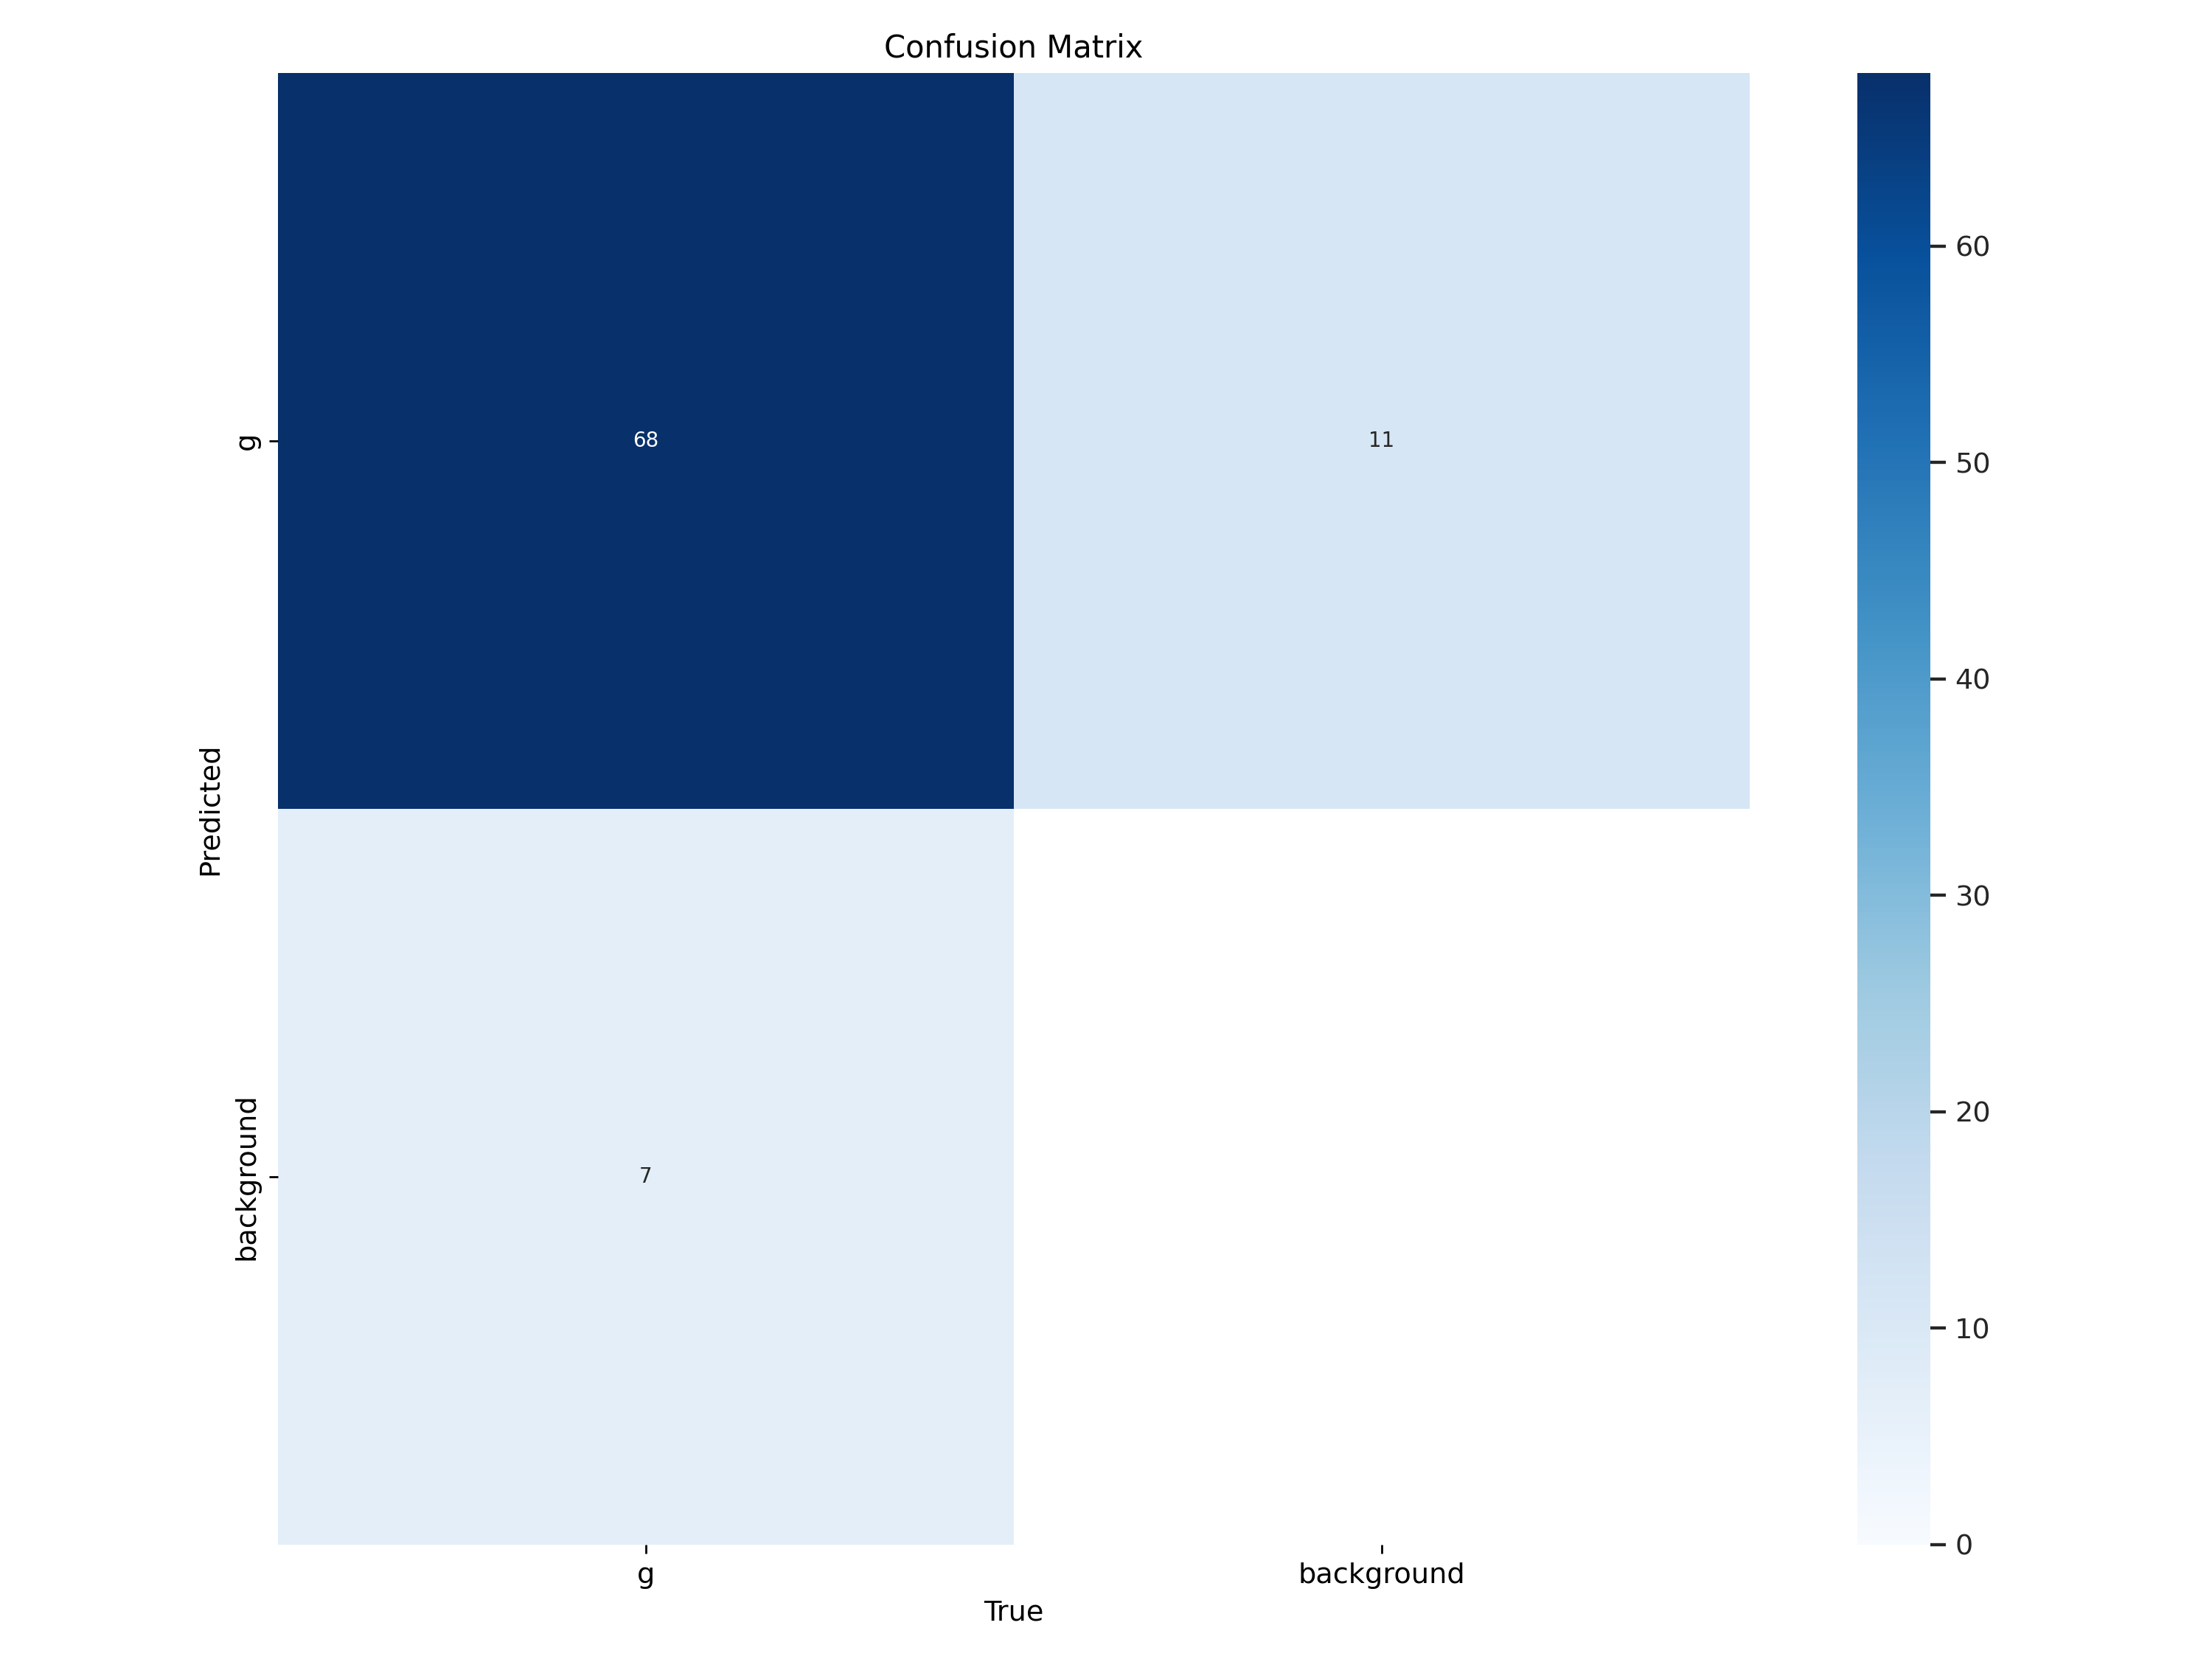

In [6]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=1000)

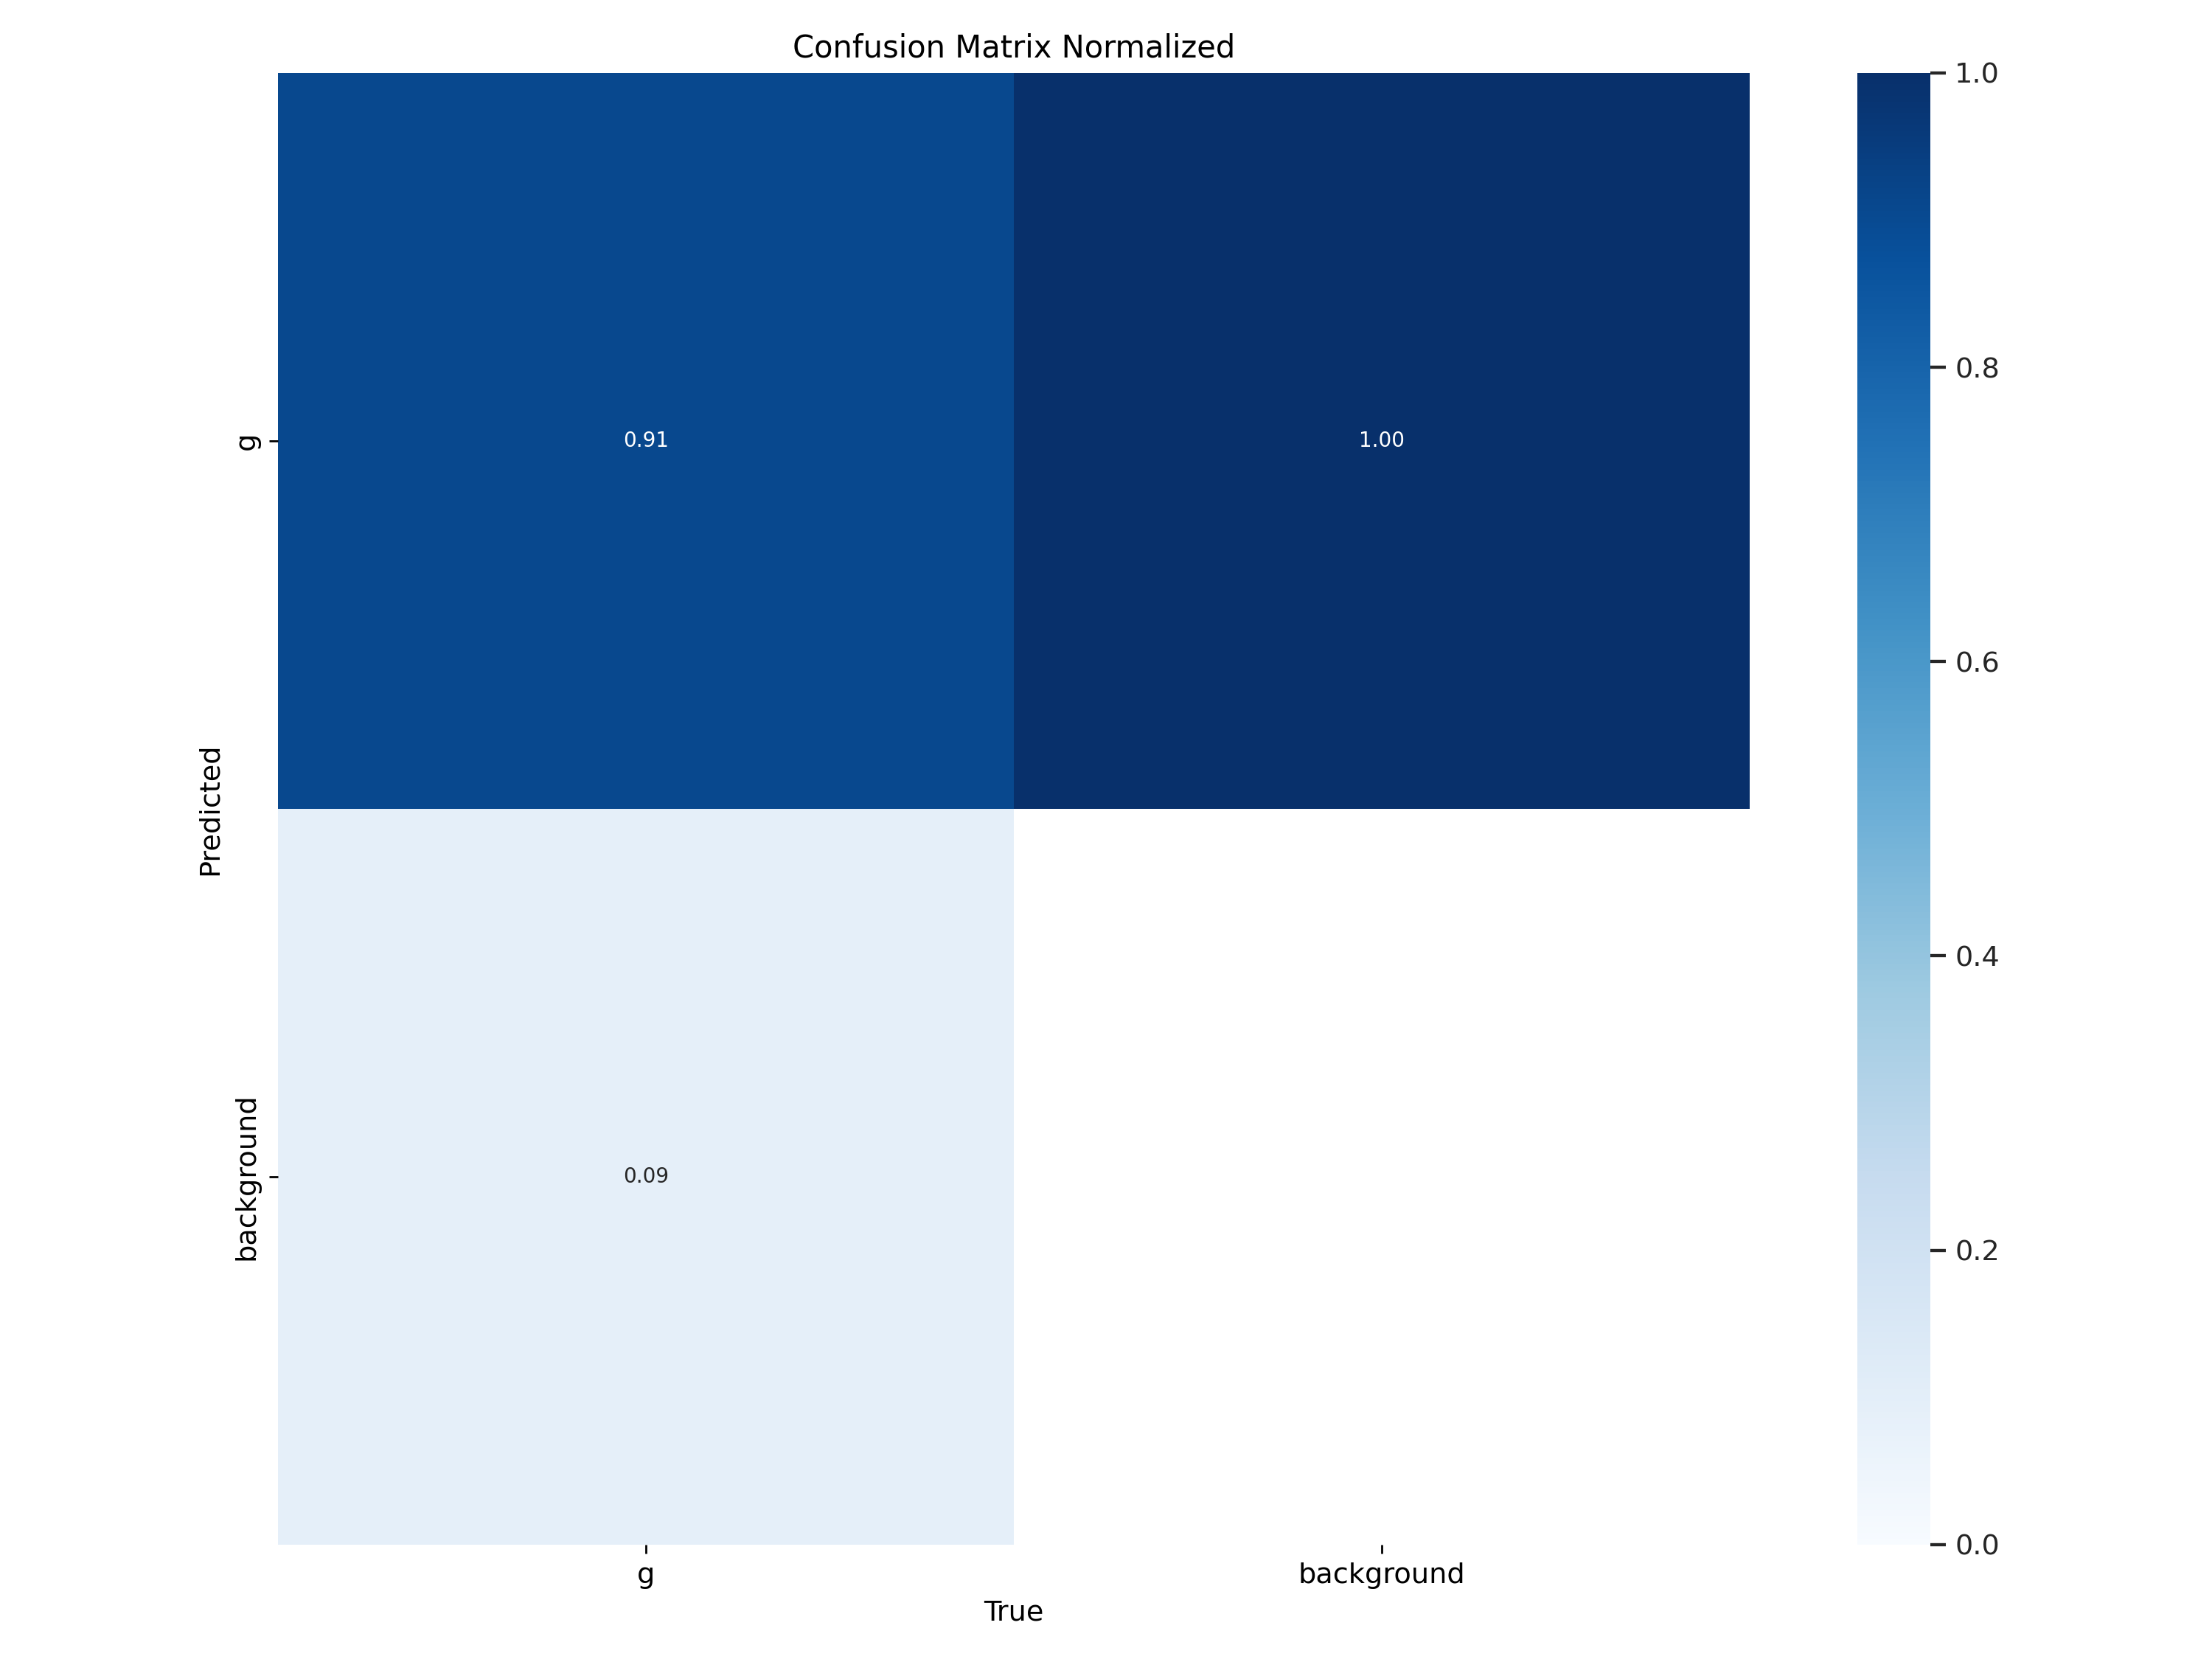

In [7]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=1000)

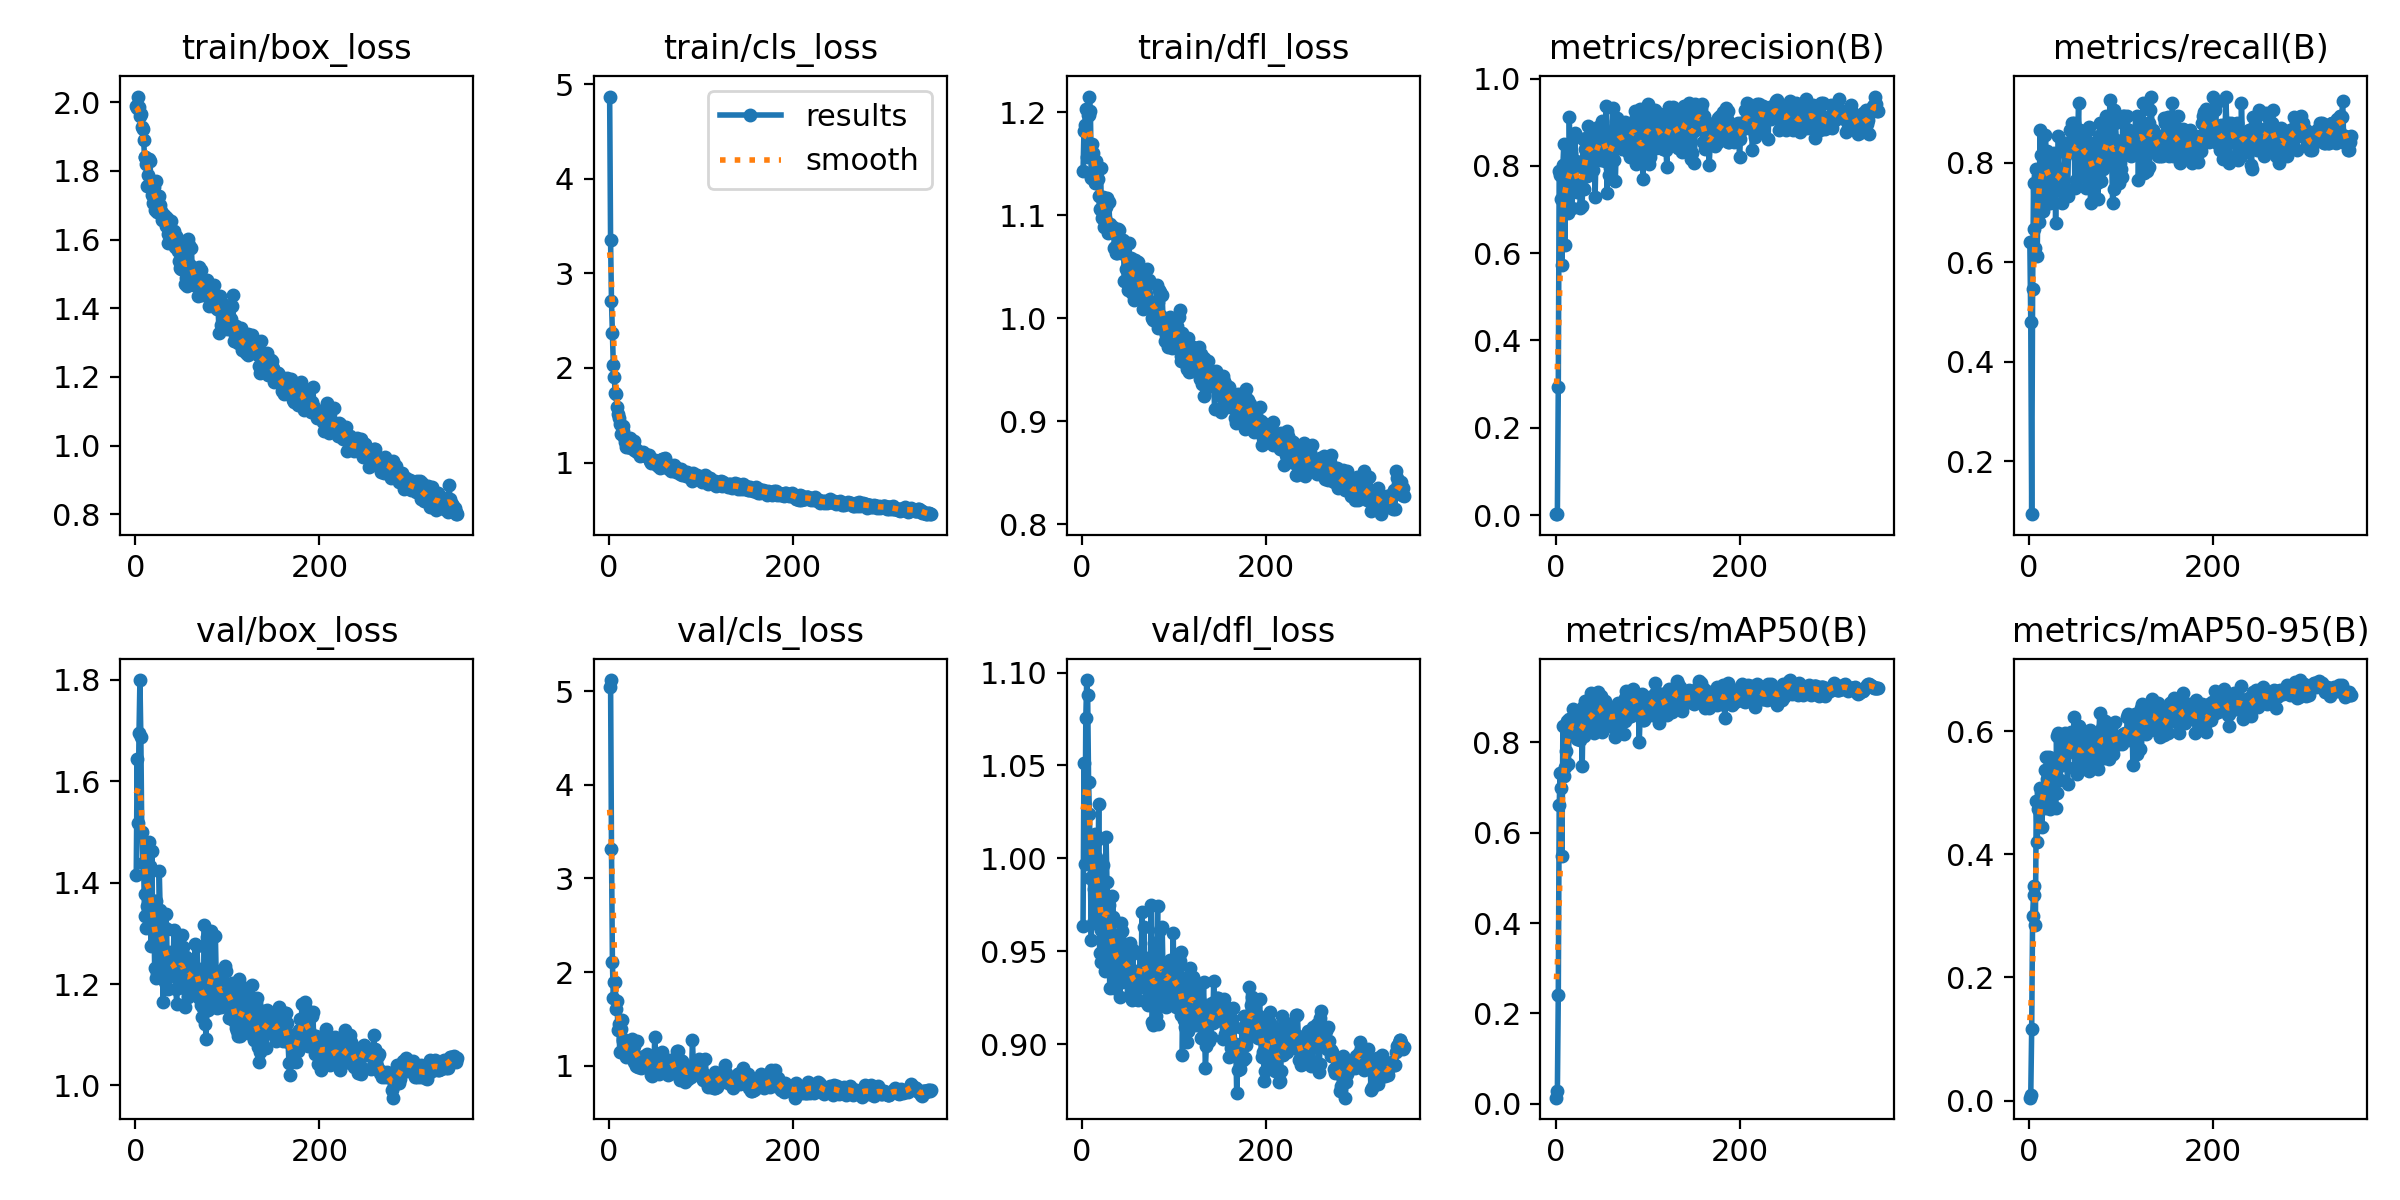

In [8]:
Image(filename=f'/content/runs/detect/train/results.png', width=1000)

Изображение с истинными метками

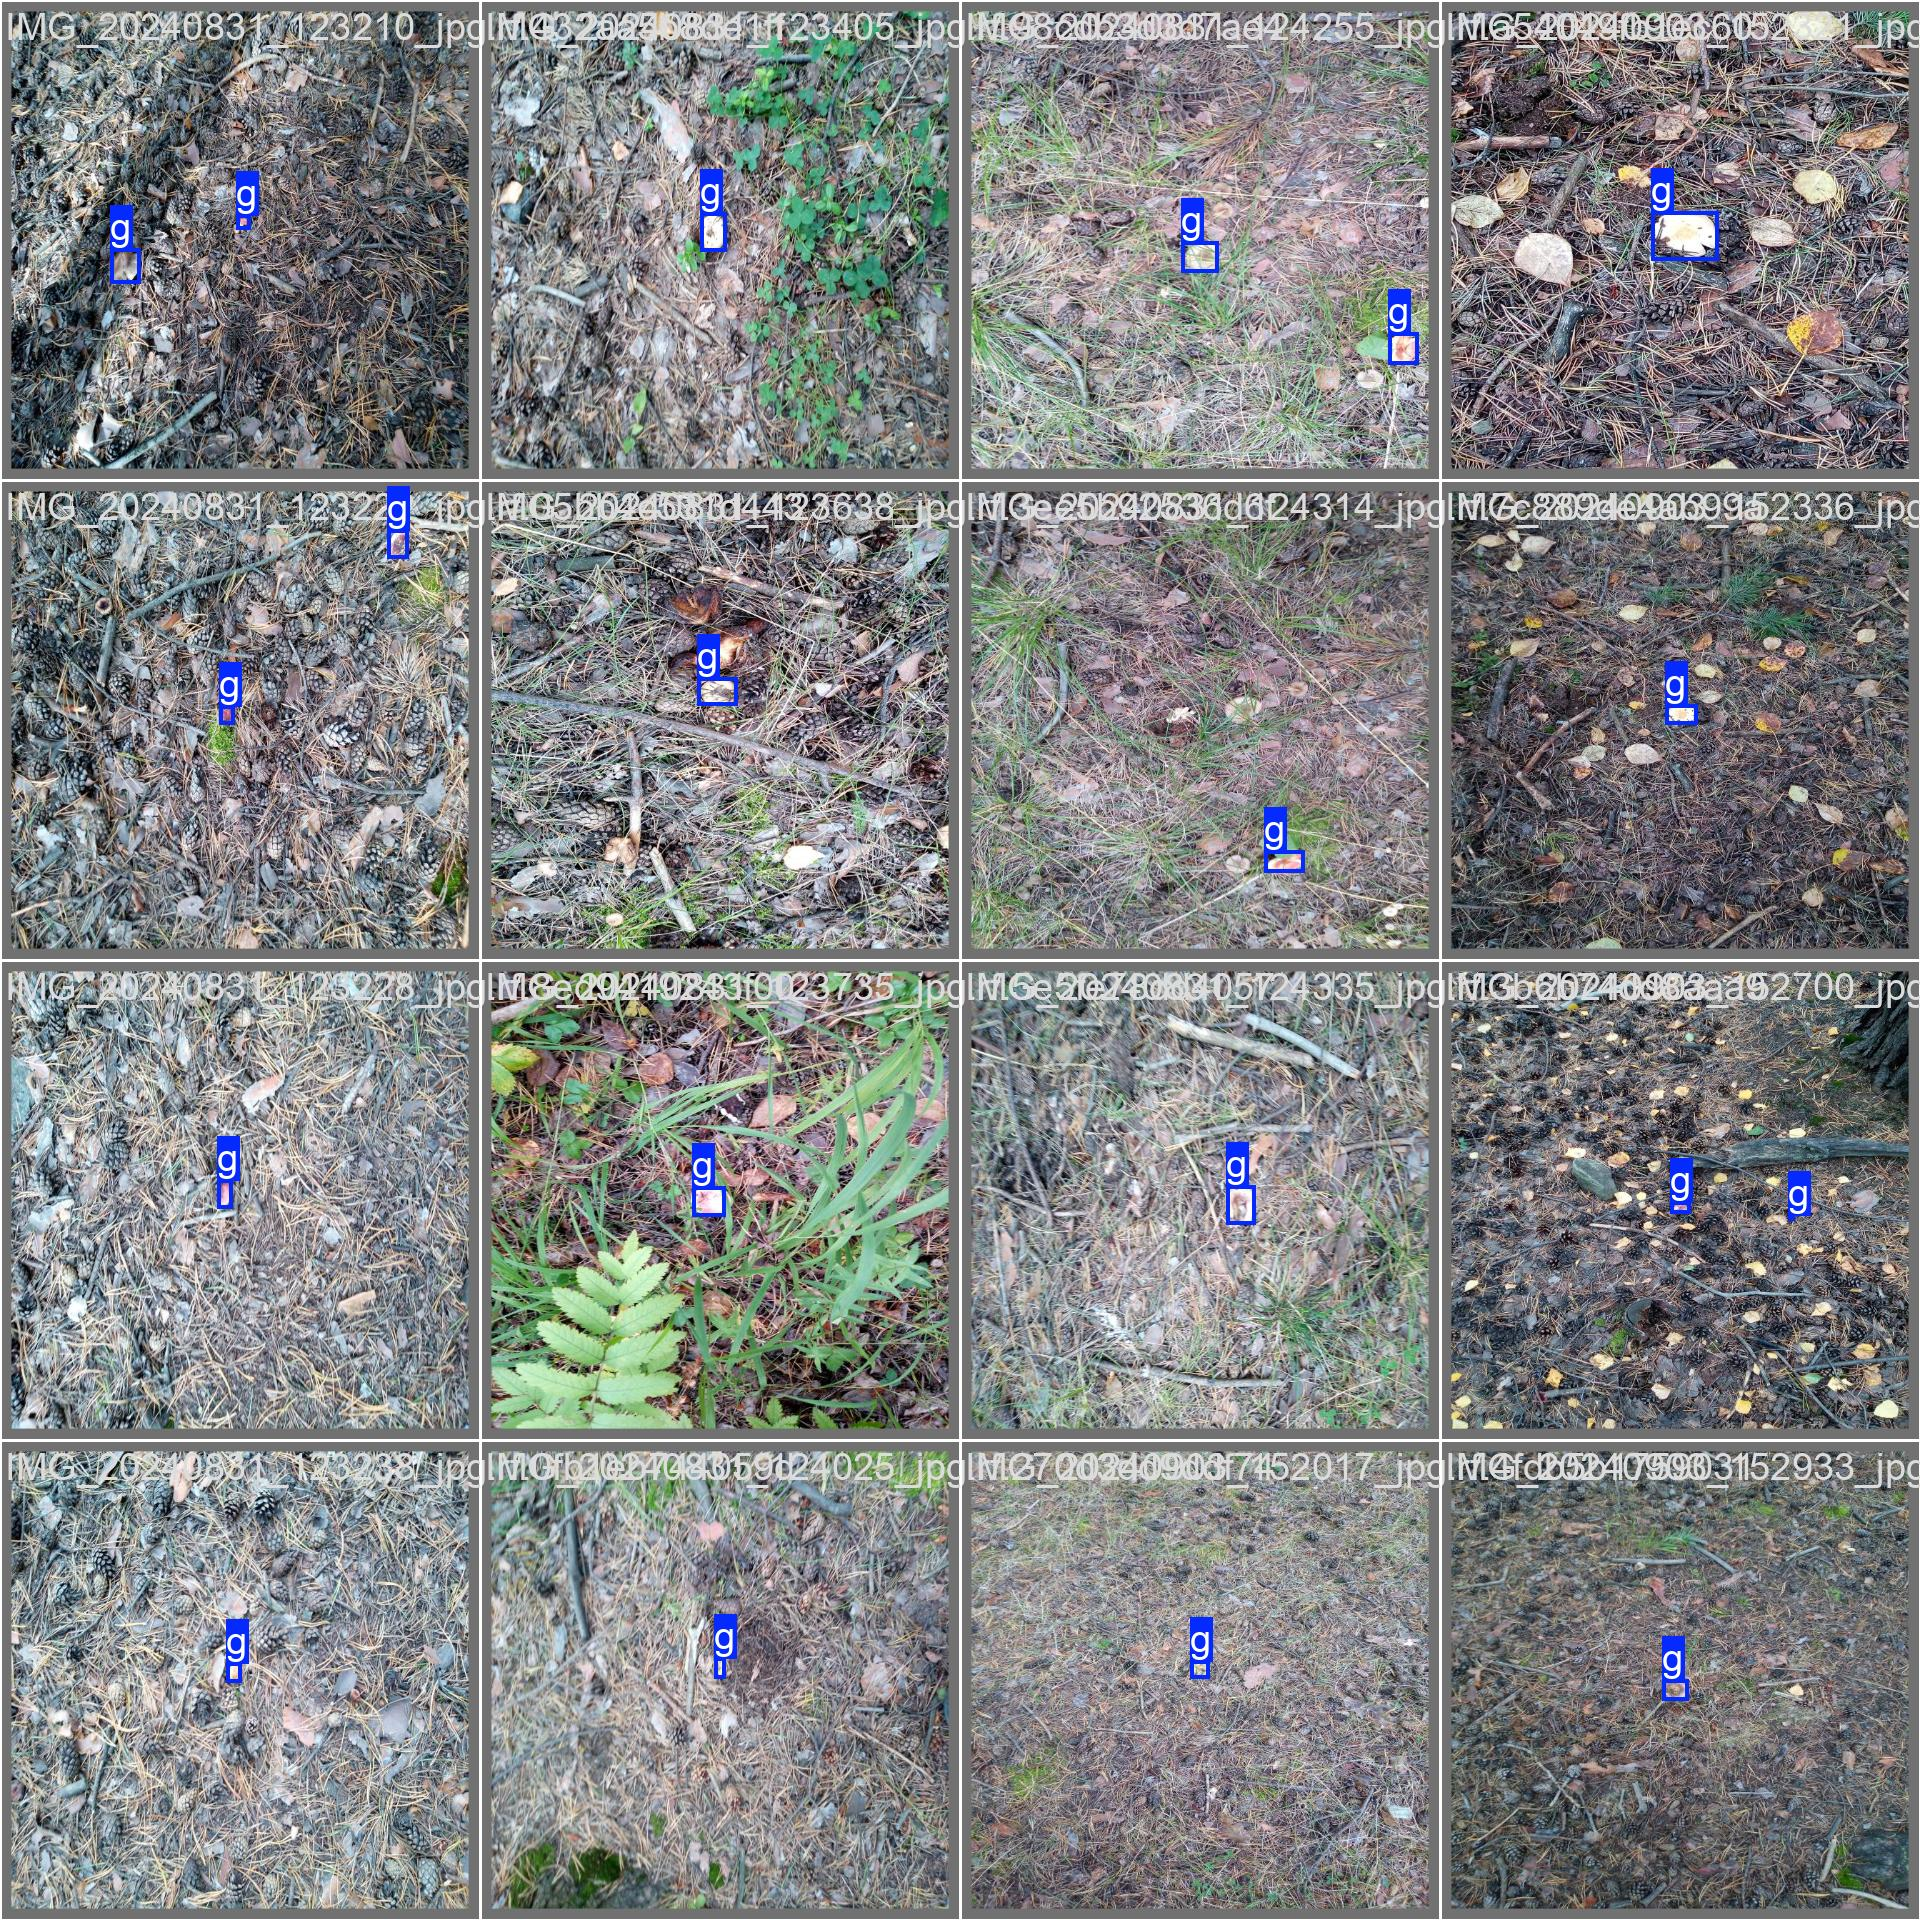

In [9]:
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg', width=1000)

Изображение с предсказанными метками

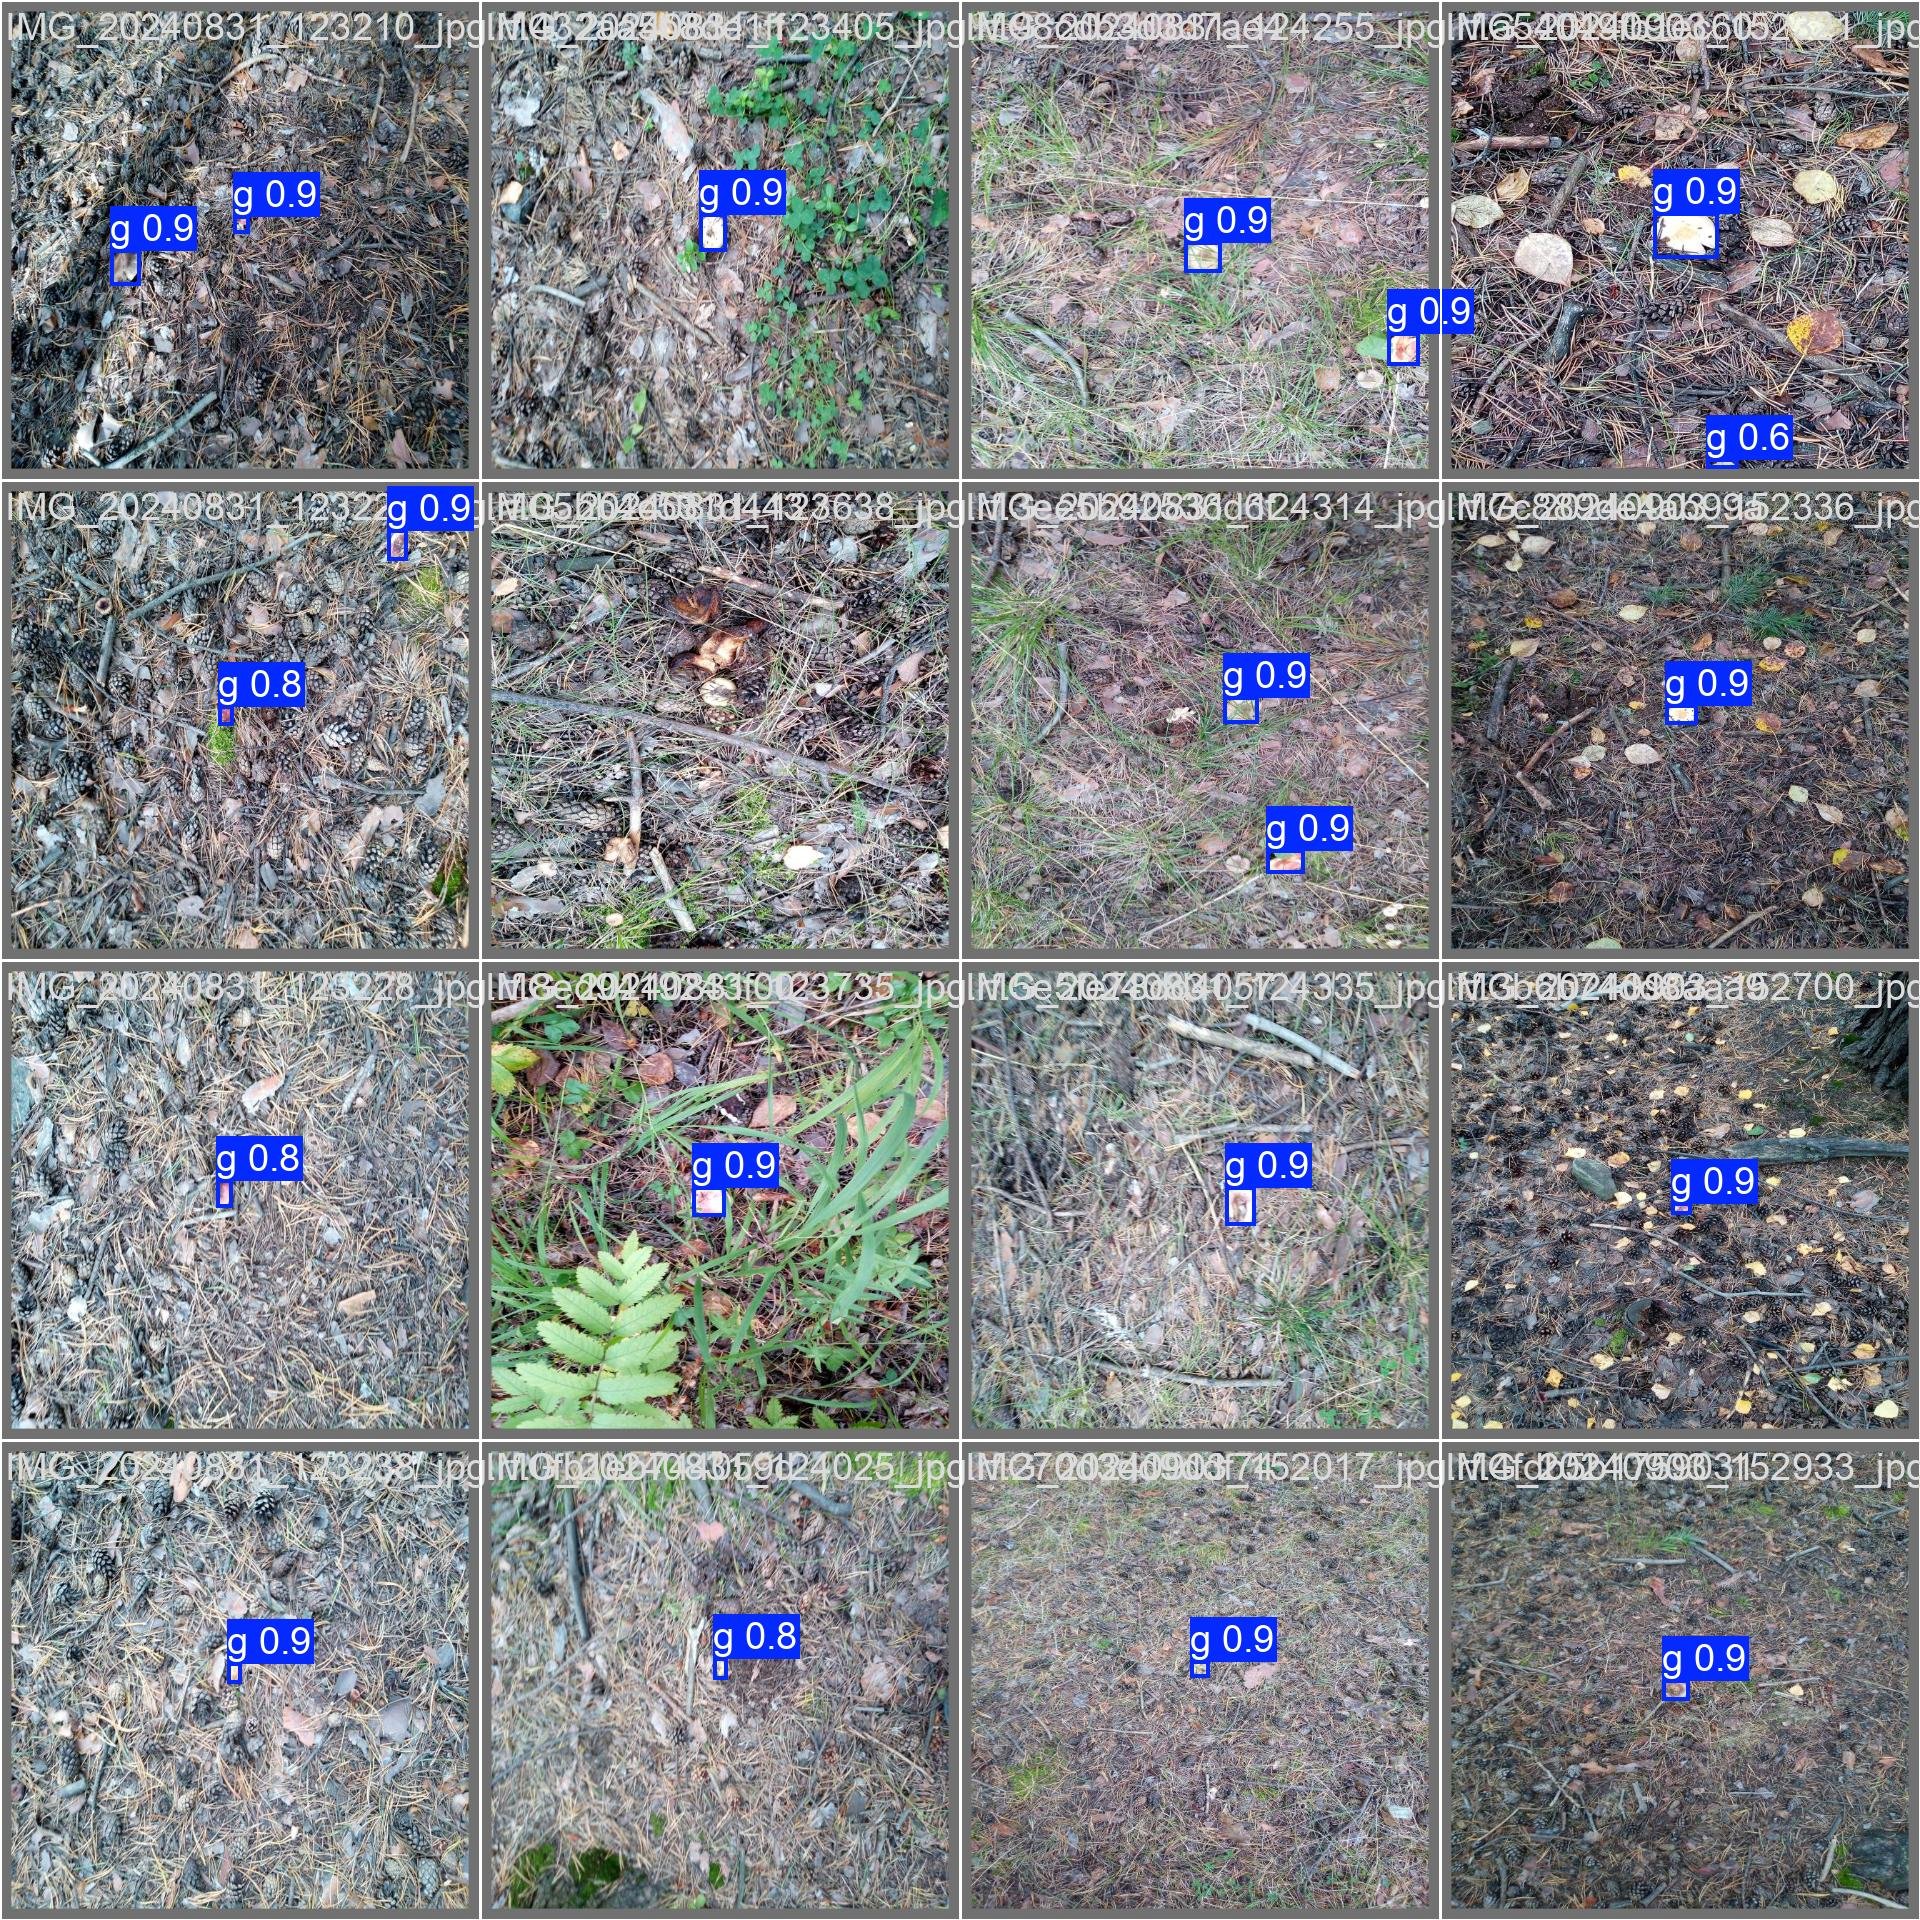

In [10]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=1000)

## Перевод в формат tflite

Берем модель best.pt из результатов обучения и переводим ее в формат tflite. В данном случае best.pt переименована для удобства в best_yolov8n_700.pt

In [ ]:
model = YOLO('/content/best_yolov8n_700.pt')  # загружаем обученную модель

# Экспортируем модель с определенным размером изображения
model.export(format='tflite', imgsz=(416, 416))

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/best_yolov8n_700.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 5, 3549) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 172.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 206.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 245.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 225.7 MB/s eta 0:00

100%|██████████| 1.11M/1.11M [00:00<00:00, 20.8MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.10file/s]

requirements: Ultralytics requirement ['onnxslim==0.1.32'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: onnxslim
    Found existing installation: onnxslim 0.1.33
    Uninstalling onnxslim-0.1.33:
      Successfully uninstalled onnxslim-0.1.33

requirements: AutoUpdate success ✅ 2.4s, installed 1 package: ['onnxslim==0.1.32']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: slimming with onnxslim 0.1.32...
ONNX: export success ✅ 3.7s, saved as '/content/best_yolov8n_700.onnx' (11.6 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 40.0s, saved as '/content/best_yolov8n_700_saved_model' (29.2 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/best_yolov8n_700_saved_model/best_yolov8n_700_float32.tflite' (11.6 MB)

Export complete (42.1s)
Results saved to /content
Predic

'/content/best_yolov8n_700_saved_model/best_yolov8n_700_float32.tflite'

В итоге получаем файл `best_yolov8n_700_float32.tflite`